In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('train.csv')
train.head(5)

,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,...,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,2052/08,MS WORD,ru,Russian Federation,NaN,CASE OF KOKOSHKINA v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0528JUD000205208,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4
1,4728/07,MS WORD,tr,Turkey,NaN,CASE OF ÖZCAN v. TURKEY,COMMITTEE,ECLI:CE:ECHR:2018:0710JUD000472807,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4
2,44135/06,MS WORD,si,Slovenia,NaN,CASE OF DANIJEL PEČNIK v. SLOVENIA,CHAMBER,ECLI:CE:ECHR:2012:1018JUD004413506,NaN,NaN,...,1,0,0,0,0,0,0,0,0,4
3,2607/08,MS WORD,ch,Switzerland,NaN,CASE OF PALANCI v. SWITZERLAND,CHAMBER,ECLI:CE:ECHR:2014:0325JUD000260708,NaN,NaN,...,0,0,-1,0,0,0,0,0,0,4
4,27001/06,MS WORD,ru,Russian Federation,NaN,CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:1001JUD002700106,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4


In [3]:
test=pd.read_csv('test.csv')
test1=pd.read_csv('test.csv')

In [4]:
train.describe()

,originatingbody,rank,respondentOrderEng,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,...,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
count,8878.000000,8878.000000,8878.000000,8878.000000,8878.000000,8878.000000,8878.000000,8878.000000,8878.000000,8878.000000,...,8878.000000,8878.000000,8878.000000,8878.000000,8878.000000,8878.000000,8878.000000,8878.000000,8878.000000,8878.000000
mean,12.255688,1357.402719,32.342532,400864.536269,14.941879,0.180221,0.550800,0.177292,0.172787,0.116242,...,0.390178,-0.001802,0.043253,0.002591,0.064654,0.000113,0.001577,0.000225,0.000788,3.461703
std,9.504175,1446.218266,14.062796,57670.790798,0.279205,0.384393,0.497441,0.381937,0.378084,0.320533,...,0.599878,0.077974,0.320771,0.078671,0.282190,0.010613,0.058112,0.015008,0.048632,0.870096
min,4.000000,171.353943,1.000000,316255.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,1.000000
25%,5.000000,582.323181,20.000000,347609.500000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,7.000000,788.466248,38.000000,394983.500000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,23.000000,1547.329742,45.000000,454025.250000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,29.000000,9968.310547,49.000000,501627.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [5]:

def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [6]:

%%time
missing_data(train)

Wall time: 408 ms


,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,...,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
Total,0,0,0,0,8202,0,0,0,8202,6630,...,0,0,0,0,0,0,0,0,0,0
Percent,0.0,0.0,0.0,0.0,92.385672,0.0,0.0,0.0,92.385672,74.678982,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,object,object,object,object,object,object,object,object,object,object,...,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64


In [7]:
train.shape

(8878, 328)

In [8]:

total = train.isnull().sum()
print(total)

appno                 0
application           0
country.alpha2        0
country.name          0
decisiondate       8202
                   ... 
ccl_article=p12       0
ccl_article=p4        0
ccl_article=p6        0
ccl_article=p7        0
importance            0
Length: 328, dtype: int64


<AxesSubplot:xlabel='importance', ylabel='count'>

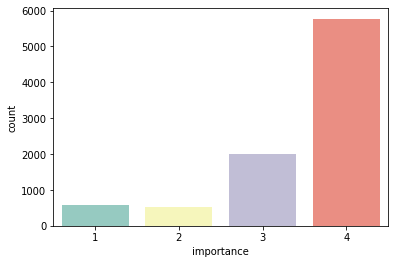

In [9]:
sns.countplot(train['importance'], palette='Set3')

In [10]:
train['importance'].value_counts()/(train.shape[0])

4    0.650372
3    0.226515
1    0.065555
2    0.057558
Name: importance, dtype: float64

In [11]:
train=train.dropna(axis='columns')
test=test.dropna(axis='columns')


train

,appno,application,country.alpha2,country.name,docname,doctypebranch,ecli,itemid,judgementdate,kpdate,...,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,2052/08,MS WORD,ru,Russian Federation,CASE OF KOKOSHKINA v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0528JUD000205208,001-92699,28/05/2009,28/05/2009,...,0,0,0,0,0,0,0,0,0,4
1,4728/07,MS WORD,tr,Turkey,CASE OF ÖZCAN v. TURKEY,COMMITTEE,ECLI:CE:ECHR:2018:0710JUD000472807,001-184490,10/07/2018,10/07/2018,...,0,0,0,0,0,0,0,0,0,4
2,44135/06,MS WORD,si,Slovenia,CASE OF DANIJEL PEČNIK v. SLOVENIA,CHAMBER,ECLI:CE:ECHR:2012:1018JUD004413506,001-113810,18/10/2012,18/10/2012,...,1,0,0,0,0,0,0,0,0,4
3,2607/08,MS WORD,ch,Switzerland,CASE OF PALANCI v. SWITZERLAND,CHAMBER,ECLI:CE:ECHR:2014:0325JUD000260708,001-141929,25/03/2014,25/03/2014,...,0,0,-1,0,0,0,0,0,0,4
4,27001/06,MS WORD,ru,Russian Federation,CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:1001JUD002700106,001-94585,01/10/2009,01/10/2009,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8873,60085/12,MS WORD,ua,Ukraine,CASE OF RASHITOV AND OTHERS v. UKRAINE,COMMITTEE,ECLI:CE:ECHR:2018:0329JUD006008512,001-181843,29/03/2018,29/03/2018,...,1,0,0,0,0,0,0,0,0,4
8874,19857/09,MS WORD,ru,Russian Federation,CASE OF URMANOV v. RUSSIA,COMMITTEE,ECLI:CE:ECHR:2016:1011JUD001985709,001-167104,11/10/2016,11/10/2016,...,0,0,0,0,0,0,0,0,0,4
8875,67253/01,MS WORD,ru,Russian Federation,CASE OF BABUSHKIN v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2007:1018JUD006725301,001-82818,18/10/2007,18/10/2007,...,0,0,0,0,0,0,0,0,0,4
8876,26737/95,MS WORD,es,Spain,CASE OF BRUALLA GÓMEZ DE LA TORRE v. SPAIN,CHAMBER,ECLI:CE:ECHR:1997:1219JUD002673795,001-58127,19/12/1997,19/12/1997,...,-1,0,0,0,0,0,0,0,0,3


In [12]:
train.head()
train=train.drop(columns=['appno','application','country.alpha2','docname','ecli','itemid','judgementdate','kpdate'])
test=test.drop(columns=['appno','application','country.alpha2','docname','ecli','itemid','judgementdate','kpdate'])

In [13]:
train.head()

,country.name,doctypebranch,languageisocode,originatingbody,originatingbody_name,originatingbody_type,parties.0,rank,respondent.0,respondentOrderEng,...,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,Russian Federation,CHAMBER,ENG,4,First Section,Court,KOKOSHKINA,685.417419,RUS,38,...,0,0,0,0,0,0,0,0,0,4
1,Turkey,COMMITTEE,ENG,26,Second Section Committee,Court,ÖZCAN,2641.901855,TUR,47,...,0,0,0,0,0,0,0,0,0,4
2,Slovenia,CHAMBER,ENG,23,Fith Section,Court,DANIJEL PEČNIK,942.213440,SVN,43,...,1,0,0,0,0,0,0,0,0,4
3,Switzerland,CHAMBER,ENG,5,Second Section,Court,PALANCI,1121.770142,CHE,46,...,0,0,-1,0,0,0,0,0,0,4
4,Russian Federation,CHAMBER,ENG,4,First Section,Court,AMANAT ILYASOVA AND OTHERS,704.821594,RUS,38,...,0,0,0,0,0,0,0,0,0,4


In [14]:
train['languageisocode'].value_counts()
train=train.drop(columns='languageisocode')
test=test.drop(columns='languageisocode')

In [15]:
train['originatingbody_name'].value_counts()

First Section               1699
Fourth Section              1508
Second Section              1184
Fith Section                1092
Third Section                990
Third Section Committee      573
Fith Section Committee       426
Fourth Section Committee     352
Chamber                      293
Grand Chamber                268
Second Section Committee     251
First Section Committee      186
Plenary                       56
Name: originatingbody_name, dtype: int64

In [16]:
train['originatingbody_type'].value_counts()
train=train.drop(columns='originatingbody_type')
test=test.drop(columns='originatingbody_type')

In [17]:
train['parties.0'].value_counts()
train=train.drop(columns='parties.0')
test=test.drop(columns='parties.0')

In [18]:
train['respondent.0'].value_counts()

RUS    1647
UKR     933
TUR     868
POL     617
HUN     364
ROU     335
BGR     304
GBR     301
HRV     255
AUT     233
SVK     227
ITA     223
MDA     219
SVN     209
DEU     196
FRA     172
AZE     134
LTU     130
SRB     127
FIN     116
MKD     110
GRC      97
NLD      96
ARM      86
CHE      73
MLT      70
SWE      67
LVA      66
GEO      61
CYP      55
PRT      51
CZE      51
BIH      50
BEL      48
ESP      47
EST      44
ALB      42
MNE      39
NOR      36
DNK      23
IRL      21
ISL      14
LUX       7
SMR       7
LIE       6
AND       1
Name: respondent.0, dtype: int64

In [19]:

train['respondentOrderEng'].value_counts()

38    1647
48     933
47     868
35     617
20     364
37     335
8      304
49     301
9      255
4      233
42     227
23     223
29     219
43     209
18     196
16     173
5      134
26     130
40     127
15     116
33     110
19      97
32      96
3       86
46      73
28      70
45      67
24      66
17      61
10      55
36      51
11      51
7       50
6       48
44      46
14      44
1       42
31      39
34      36
13      23
22      21
21      14
27       7
39       7
25       6
2        1
Name: respondentOrderEng, dtype: int64

In [20]:

train['separateopinion'].value_counts()

False    7356
True     1522
Name: separateopinion, dtype: int64

In [21]:
train['typedescription'].value_counts()

15    8363
14     490
12      17
18       7
19       1
Name: typedescription, dtype: int64

In [22]:

train['documentcollectionid=CASELAW'].value_counts()

1    8878
Name: documentcollectionid=CASELAW, dtype: int64

In [23]:
train['documentcollectionid=JUDGMENTS'].value_counts()

1    8878
Name: documentcollectionid=JUDGMENTS, dtype: int64

In [24]:
one = pd.get_dummies(train)
two=pd.get_dummies(test)

In [25]:
o = pd.get_dummies(one['separateopinion'])
p=pd.get_dummies(two['separateopinion'])

In [26]:

one=pd.concat([one,o],axis=1)
two=pd.concat([two,p],axis=1)

In [27]:
one=one.drop(columns='separateopinion')
two=two.drop(columns='separateopinion')

In [28]:

train=one
test=two

In [29]:
train

,originatingbody,rank,respondentOrderEng,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,...,respondent.0_RUS,respondent.0_SMR,respondent.0_SRB,respondent.0_SVK,respondent.0_SVN,respondent.0_SWE,respondent.0_TUR,respondent.0_UKR,False,True
0,4,685.417419,38,349418,15,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,26,2641.901855,47,476616,15,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,23,942.213440,43,373194,15,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,5,1121.770142,46,392525,15,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,4,704.821594,38,423100,15,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8873,29,2424.463379,48,473530,15,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
8874,27,1698.433228,38,456937,15,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
8875,6,607.506531,38,340823,15,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
8876,9,362.514832,44,443927,15,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:

corr =train.corr()
corr

,originatingbody,rank,respondentOrderEng,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,...,respondent.0_RUS,respondent.0_SMR,respondent.0_SRB,respondent.0_SVK,respondent.0_SVN,respondent.0_SWE,respondent.0_TUR,respondent.0_UKR,False,True
originatingbody,1.000000,0.384179,0.083760,0.400250,0.092160,0.017110,0.029634,-0.020962,-0.008471,-0.089889,...,-0.021774,-0.019757,0.039877,-0.033191,0.004734,0.018333,-0.138270,0.378686,0.185638,-0.185638
rank,0.384179,1.000000,-0.008587,0.673655,0.095736,0.073302,-0.158580,-0.035908,0.040817,0.013101,...,0.089161,0.028670,0.042634,-0.035801,-0.043783,-0.039308,-0.056560,0.053941,0.069159,-0.069159
respondentOrderEng,0.083760,-0.008587,1.000000,-0.136875,0.047533,0.101112,-0.009195,0.003059,0.079570,-0.031826,...,0.192009,0.013299,0.065601,0.111249,0.117678,0.078492,0.343127,0.381565,0.041217,-0.041217
sharepointid,0.400250,0.673655,-0.136875,1.000000,0.069962,0.118941,-0.268010,-0.089095,0.056179,0.090803,...,0.066923,0.025297,0.046571,-0.087350,-0.085613,0.011014,-0.108301,-0.032122,-0.107798,0.107798
typedescription,0.092160,0.095736,0.047533,0.069962,1.000000,0.061922,0.035049,-0.075549,0.034317,-0.039045,...,0.058876,-0.008526,0.025079,0.005607,0.019019,-0.009817,-0.002107,0.059499,0.130104,-0.130104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
respondent.0_SWE,0.018333,-0.039308,0.078492,0.011014,-0.009817,0.036994,-0.012831,-0.013218,-0.036411,0.017103,...,-0.041617,-0.002450,-0.010505,-0.014126,-0.013540,1.000000,-0.028706,-0.029883,-0.101921,0.101921
respondent.0_TUR,-0.138270,-0.056560,0.343127,-0.108301,-0.002107,0.014374,-0.008459,-0.013793,0.027106,-0.030644,...,-0.157105,-0.009247,-0.039657,-0.053324,-0.051113,-0.028706,1.000000,-0.112807,-0.031390,0.031390
respondent.0_UKR,0.378686,0.053941,0.381565,-0.032122,0.059499,0.025661,0.098285,0.029415,-0.010891,-0.050942,...,-0.163547,-0.009626,-0.041283,-0.055510,-0.053209,-0.029883,-0.112807,1.000000,0.111048,-0.111048
False,0.185638,0.069159,0.041217,-0.107798,0.130104,-0.002880,0.111946,0.034305,0.022910,-0.180968,...,0.111755,-0.029813,0.027112,0.033922,0.007550,-0.101921,-0.031390,0.111048,1.000000,-1.000000


In [31]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X=train.drop(columns='importance')
X = preprocessing.normalize(X)
y=train['importance']
test=preprocessing.normalize(test)

In [32]:
y

0       4
1       4
2       4
3       4
4       4
       ..
8873    4
8874    4
8875    4
8876    3
8877    4
Name: importance, Length: 8878, dtype: int64

Class=4, n=5774 (25.000%)
Class=3, n=5774 (25.000%)
Class=2, n=5774 (25.000%)
Class=1, n=5774 (25.000%)


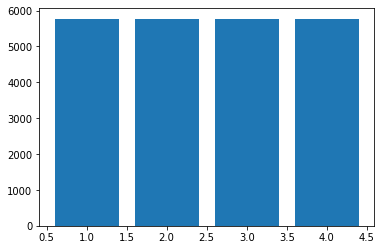

In [33]:
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# label encode the target variable
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=42)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23072, 386)
(24, 386)
(23072,)
(24,)


In [36]:
''''from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)
knn_predictions = knn_classifier.predict(X_test)'''

"'from sklearn.neighbors import KNeighborsClassifier\nknn_classifier = KNeighborsClassifier()\nknn_classifier.fit(X_train,y_train)\nknn_predictions = knn_classifier.predict(X_test)"

In [37]:

from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [38]:
from xgboost import XGBClassifier

In [39]:

clf= XGBClassifier(eval_metric='auc',learning_rate=0.4,max_depth=6,objective='multi:softprob')
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.4, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:

y_pred=clf.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))
#97835

Accuracy: 1.0


In [42]:

test1.head()


,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,...,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7
0,1194/04,MS WORD,mk,North Macedonia,NaN,"CASE OF CAMINSKI v. ""THE FORMER YUGOSLAV REPUB...",COMMITTEE,ECLI:CE:ECHR:2011:0224JUD000119404,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
1,53865/11,MS WORD,ua,Ukraine,NaN,CASE OF KUSHCH v. UKRAINE,CHAMBER,ECLI:CE:ECHR:2015:1203JUD005386511,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
2,43838/07,MS WORD,ie,Ireland,NaN,CASE OF O. v. IRELAND,COMMITTEE,ECLI:CE:ECHR:2012:0119JUD004383807,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
3,11157/04,MS WORD,ru,Russian Federation,NaN,CASE OF ANCHUGOV AND GLADKOV v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2013:0704JUD001115704,NaN,"Articles 32-33,134 and 135 of the Constitution",...,0,0,0,0,0,0,0,0,0,0
4,42443/02,MS WORD,ru,Russian Federation,NaN,CASE OF EMINBEYLI v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0226JUD004244302,NaN,"Articles 1, 11, 89, 96 and 122 of the Code of ...",...,1,0,0,0,0,0,0,0,0,0


In [43]:
sample=pd.read_csv('sample_submission.csv')
sample

,appno,importance
0,2052/08,4
1,4728/07,4
2,44135/06,4
3,2607/08,4
4,27001/06,4


In [44]:
appno=test1['appno']
importance=clf.predict(test)

In [45]:
dict = {'appno':appno, 'importance':importance}  
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv('sub.csv',index=False)

In [46]:
sub=pd.read_csv('sub.csv')
sub

,appno,importance
0,1194/04,4
1,53865/11,4
2,43838/07,4
3,11157/04,3
4,42443/02,3
...,...,...
4755,4345/06,4
4756,10761/09,4
4757,805/09,4
4758,44711/16,4
